In [2]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_style("white")

In [20]:
workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
print(workspace)
model_id = "20230509_0_malignancy/fold4/"
tasks = ["malignancy"]

C:\Users\Kieran\Documents\LUNA23-ISMI-Group7


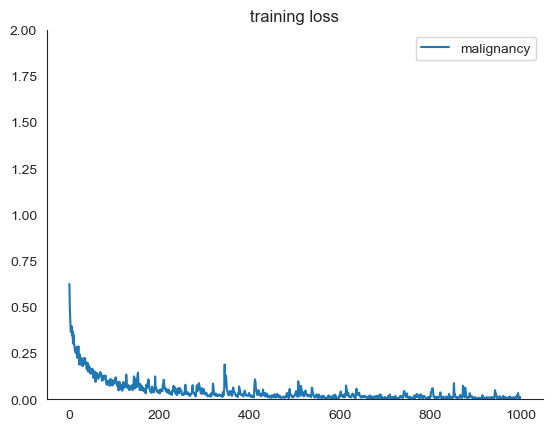

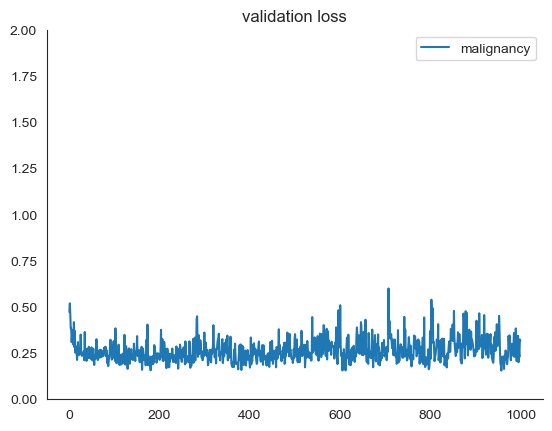

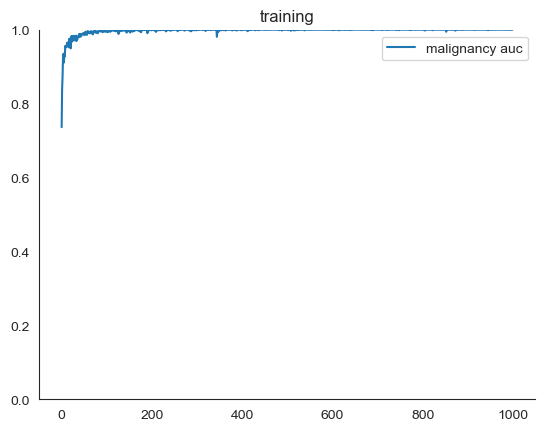

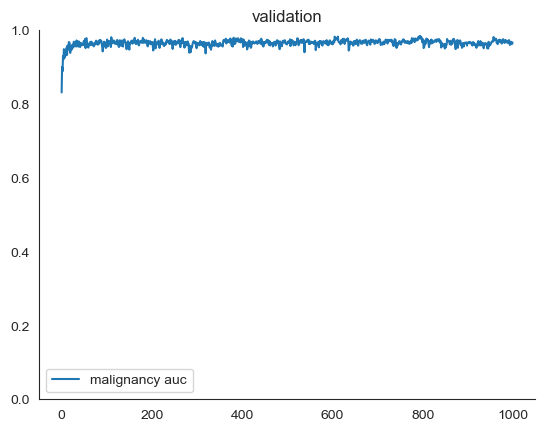

In [21]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 2])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "noduletype": "balanced_accuracy"
}

for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()

In [10]:
workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
model_id = "20230509_0_malignancy/fold1/"
tasks = ["malignancy"]

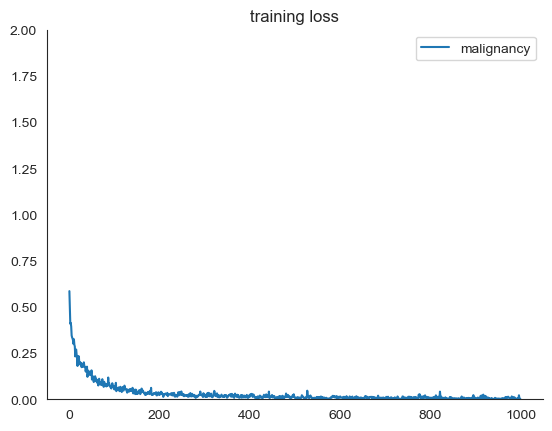

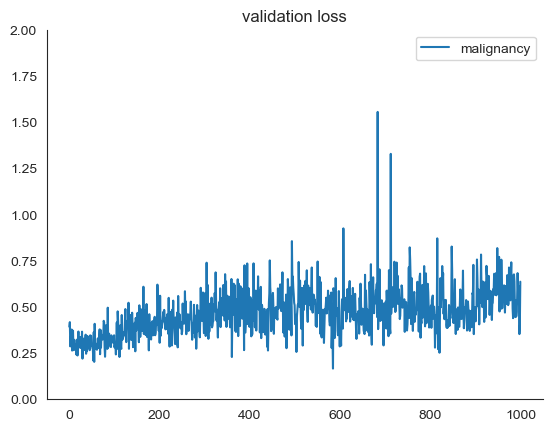

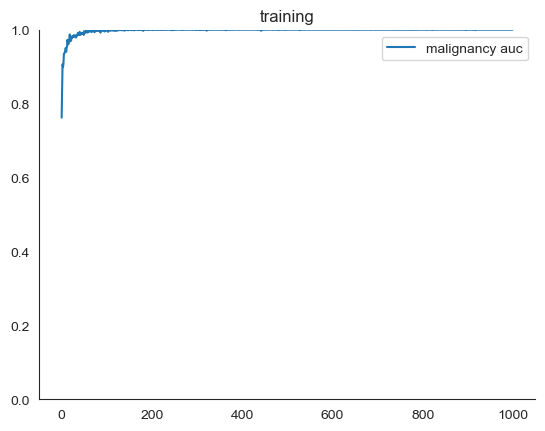

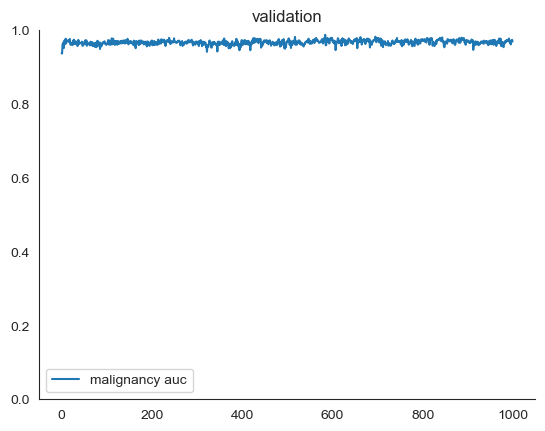

In [11]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 2])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "noduletype": "balanced_accuracy"
}

for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()

In [ ]:
workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
model_id = "20230509_0_malignancy/fold1/"

predictions = np.load(workspace / "results" / model_id / "predictions.npy").item() #, allow_pickle = True
labels = np.load(workspace / "results" / model_id / "labels.npy").item() #, allow_pickle = True


In [ ]:
confusion_matrix(labels['malignancy'], predictions['malignancy'])

In [ ]:
confusion_matrix(labels['nodule-type'], predictions['nodule-type'])